# Code

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import jupyter_black

jupyter_black.load()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import epiphany as ep

# Data

In [2]:
# Initialize Identity globals from the netrunnerdb database
id_df = ep.get_id_data_from_file("data/cards/cards.json")

In [3]:
# Meta constants for graph titles and filenames
meta = "RWR 2024-03 Banlist"
meta_file_prefix = "rwr-2024-03"

tournaments = [
    ["2024-03-23-nanpc-vancouver", "aesops"],
    ["2024-03-23-nottingham-co", "aesops"],
    ["2024-03-24-amt", "aesops"],
    ["2024-03-26-montreal-gnk", "cobra"],
    ["2024-03-30-atomic-empire-nc-co", "cobra"],
    ["2024-03-30-fly-to-emea-online-gnk", "aesops"],
    ["2024-03-30-merseyside-grid-co", "aesops"],
    ["2024-03-30-nyc-co", "aesops"],
    ["2024-04-06-amt", "aesops"],
    ["2024-04-06-norwich-co", "cobra"],
    ["2024-04-04-no-stakes-gnk", "aesops"],
    ["2024-04-06-vpc-berkeley-co", "aesops"],
    ["2024-04-07-montreal-co", "aesops"],
    ["2024-04-07-london-h1-co", "cobra"],
    ["2024-04-18-prep-co-seattle", "aesops"],
    ["2024-04-20-apac-online-co", "aesops"],
    ["2024-04-20-nanpc-toronto", "aesops"],
    ["2024-04-21-amt", "aesops"],
    ["2024-04-21-torino-co", "aesops"],
    ["2024-04-21-yaoibunga-carnival-gnk", "cobra"],
    ["2024-04-21-zioras-clubhouse-co", "aesops"],
    ["2024-04-27-brisbane-gnk", "aesops"],
    ["2024-04-27-emerald-city-grid-co", "aesops"],
    ["2024-04-27-fly-to-emea-online-gnk", "aesops"],
    ["2024-04-27-naarm-melbourne-co", "aesops"],
    ["2024-04-28-nyc-queens-co", "aesops"],
    ["2024-05-02-may-no-stakes-sf-gnk", "aesops"],
    ["2024-05-04-amt", "aesops"],
    ["2024-05-04-cambridge-co", "cobra"],
    ["2024-05-04-milano-co", "aesops"],
    ["2024-05-04-munich-co", "aesops"],
    ["2024-05-04-twin-cities-co", "aesops"],
    ["2024-05-05-nj-co", "aesops"],
    ["2024-05-11-common-ground-dallas-gnk", "aesops"],
    ["2024-05-11-lincon-co", "cobra"],
    ["2024-05-11-los-angeles-co", "cobra"],
    ["2024-05-12-401-games-gnk", "cobra"],
    ["2024-05-14-seattle-tuesday-co", "aesops"],
    ["2024-05-18-leuven-co", "aesops"],
    ["2024-05-18-magnetic-moshing-h2-co", "aesops"],
    ["2024-05-18-online-summer-showdown-co", "aesops"],
    ["2024-05-18-rain-city-gnk", "cobra"],
    ["2024-05-19-amt", "aesops"],
]

In [4]:
# load data for all tournaments
flattened_matches, paired_matches = ep.aggregate_tournament_data(id_df, tournaments)

In [5]:
flattened_matches

,event,date,YM,table,round,id,runnerScore,corpScore,combinedScore,intentionalDraw,...,runnerPlay,corpPlay,name,rank,corpIdentity,runnerIdentity,corpFaction,runnerFaction,role,winner
0,NANPC Vancouver,2024-03-23,2024-03,13,1,2588,0.0,0.0,0.0,False,...,0,1,S@nit1zedPumpk1n,26,Built to Last,Tāo Salonga,weyland-consortium,shaper,NaN,NaN
1,NANPC Vancouver,2024-03-23,2024-03,13,1,2569,3.0,0.0,3.0,False,...,1,0,0thmxma,16,Sportsmetal,Lat,haas-bioroid,shaper,NaN,NaN
2,NANPC Vancouver,2024-03-23,2024-03,9,1,2573,0.0,0.0,0.0,False,...,0,1,RedLuigi,32,A Teia,Captain Padma Isbister,jinteki,shaper,NaN,NaN
3,NANPC Vancouver,2024-03-23,2024-03,9,1,2584,3.0,0.0,3.0,False,...,1,0,Gaurav,17,Precision Design,Rielle “Kit” Peddler,haas-bioroid,shaper,NaN,NaN
4,NANPC Vancouver,2024-03-23,2024-03,16,1,2585,0.0,0.0,0.0,False,...,0,1,Scoot,30,Pravdivost Consulting,Ken “Express” Tenma,nbn,criminal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,Standard AMT - May 19th,2024-05-19,2024-05,1,7,3409,3.0,0.0,3.0,False,...,1,0,α,4,A Teia,Arissana Rocha Nahu,jinteki,shaper,NaN,NaN
3682,Standard AMT - May 19th,2024-05-19,2024-05,2,7,3414,0.0,3.0,3.0,False,...,0,1,Jai,2,AgInfusion,Hoshiko Shiro,jinteki,anarch,NaN,NaN
3683,Standard AMT - May 19th,2024-05-19,2024-05,2,7,3419,0.0,0.0,0.0,False,...,1,0,Atien,3,Azmari EdTech,Esâ Afontov,nbn,anarch,NaN,NaN
3684,Standard AMT - May 19th,2024-05-19,2024-05,3,8,3409,0.0,0.0,0.0,False,...,0,1,α,4,A Teia,Arissana Rocha Nahu,jinteki,shaper,NaN,NaN


In [6]:
paired_matches

,event,date,YM,round,table,corp,runner,corp_wins,runner_wins,corp_player,corp_rank,runner_player,runner_rank
0,NANPC Vancouver,2024-03-23,2024-03,1,13,Built to Last,Lat,0,1,S@nit1zedPumpk1n,26,0thmxma,16
1,NANPC Vancouver,2024-03-23,2024-03,1,9,A Teia,Rielle “Kit” Peddler,0,1,RedLuigi,32,Gaurav,17
2,NANPC Vancouver,2024-03-23,2024-03,1,16,Pravdivost Consulting,Rielle “Kit” Peddler,0,1,Scoot,30,Whiteblade,1
3,NANPC Vancouver,2024-03-23,2024-03,1,4,Ob Superheavy Logistics,Esâ Afontov,0,1,Geoff F,31,hams,4
4,NANPC Vancouver,2024-03-23,2024-03,1,14,Asa Group,Hoshiko Shiro,0,1,bilby,10,FireRL,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,Standard AMT - May 19th,2024-05-19,2024-05,6,5,A Teia,Sebastião Souza Pessoa,1,0,HaverOfFun,6,Tyranda☆,16
2006,Standard AMT - May 19th,2024-05-19,2024-05,6,4,The Outfit,Lat,1,0,pacx,8,TheRobin,9
2007,Standard AMT - May 19th,2024-05-19,2024-05,7,1,A Teia,Arissana Rocha Nahu,0,1,dolmant,1,α,4
2008,Standard AMT - May 19th,2024-05-19,2024-05,7,2,AgInfusion,Esâ Afontov,1,0,Jai,2,Atien,3


In [7]:
paired_matches.to_csv(f"output/{meta_file_prefix}-paired-matches.csv")

# ID Win Rates

In [8]:
ep.get_runner_win_rate(flattened_matches)

,runnerIdentity,total_wins,matches_played,win_ratio
0,René “Loup” Arcemont,112,209,0.535885
1,Los,14,28,0.500000
2,Ayla “Bios” Rahim,3,6,0.500000
3,Hoshiko Shiro,204,429,0.475524
4,Arissana Rocha Nahu,121,272,0.444853
5,Mercury,19,43,0.441860
6,Lat,70,167,0.419162
7,Sebastião Souza Pessoa,26,63,0.412698
8,Rielle “Kit” Peddler,95,234,0.405983
9,Akiko Nisei,6,15,0.400000


In [9]:
ep.get_corp_win_rate(flattened_matches)

,corpIdentity,total_wins,matches_played,win_ratio
0,Near-Earth Hub,45,64,0.703125
1,Azmari EdTech,119,179,0.664804
2,Reality Plus,190,292,0.650685
3,Restoring Humanity,20,31,0.645161
4,MirrorMorph,21,34,0.617647
5,AgInfusion,97,164,0.591463
6,Epiphany Analytica,29,51,0.568627
7,Personal Evolution,51,90,0.566667
8,Pravdivost Consulting,27,49,0.551020
9,Asa Group,70,128,0.546875


# Matchup Matrix

<Axes: title={'center': 'RWR 2024-03 Banlist - 5+ obs - Corp Win Rates (Number is Total Games Played)'}, xlabel='runner', ylabel='corp'>

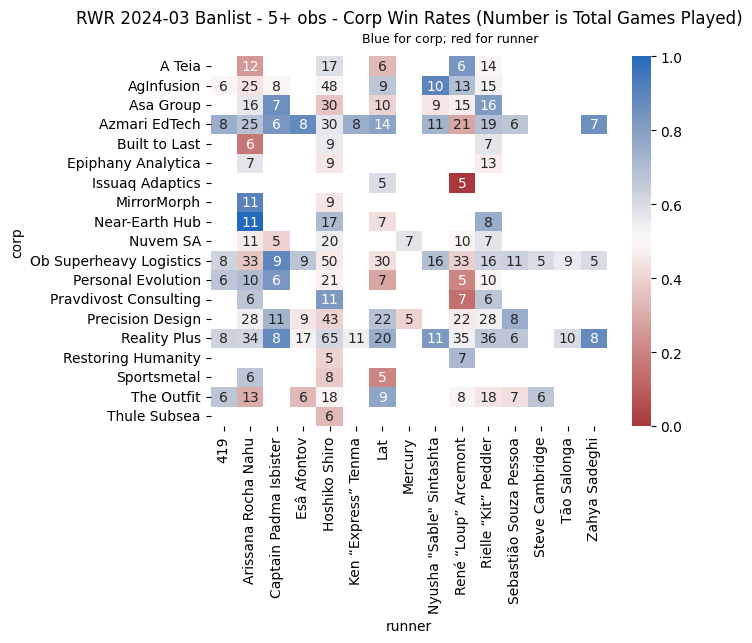

In [10]:
ep.get_heatmap(meta, ep.get_paired_winrate(paired_matches), 4)

<Axes: title={'center': 'RWR 2024-03 Banlist - May Only - 2+ obs - Corp Win Rates (Number is Total Games Played)'}, xlabel='runner', ylabel='corp'>

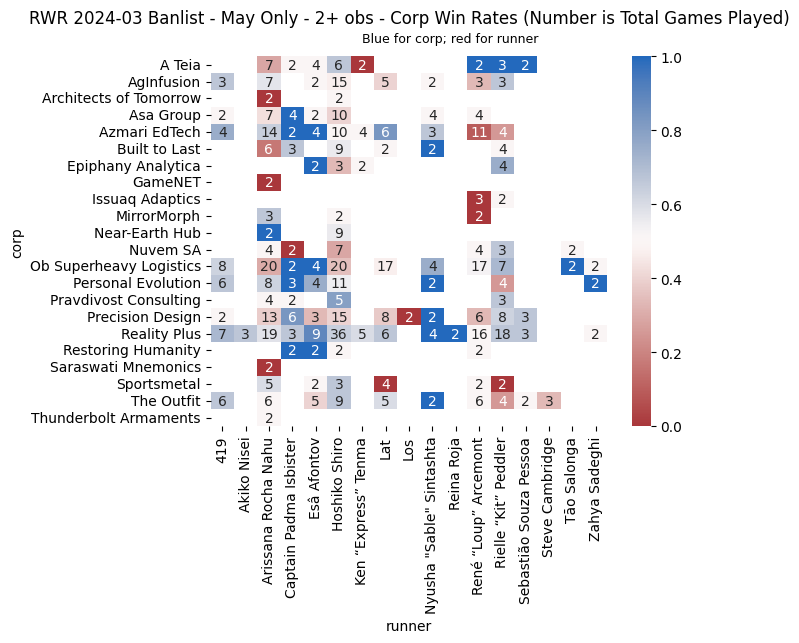

In [11]:
ep.get_heatmap(
    f"{meta} - May Only",
    ep.get_paired_winrate(paired_matches[paired_matches["YM"] == "2024-05"]),
    1,
)

# Popularity Over Time

In [12]:
corp_popularity_by_month_pct = ep.get_corp_popularity_by_month(flattened_matches)

In [13]:
runner_popularity_by_month_pct = ep.get_runner_popularity_by_month(flattened_matches)

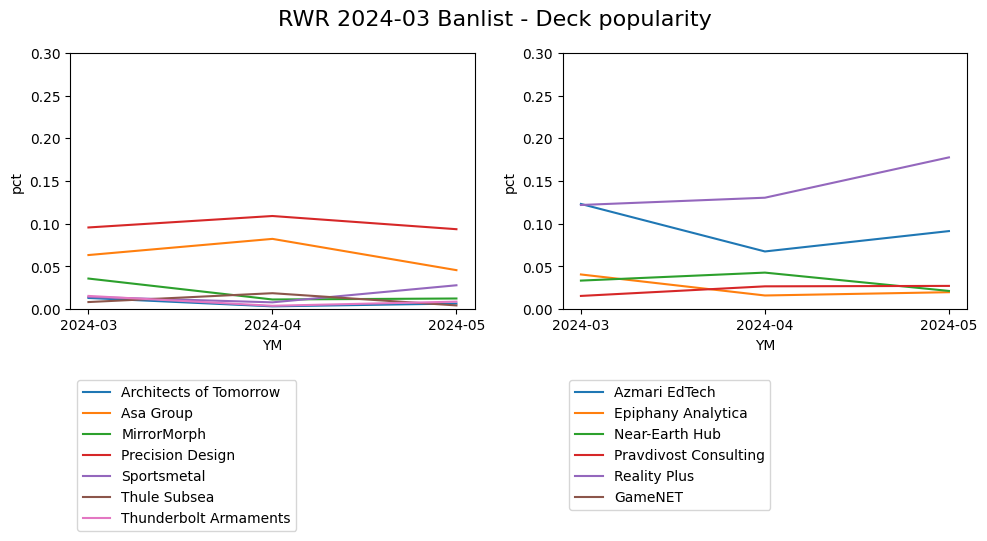

In [14]:
ep.plot_corp_popularity_two_up(
    corp_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.hb,
    ep.nbn,
)

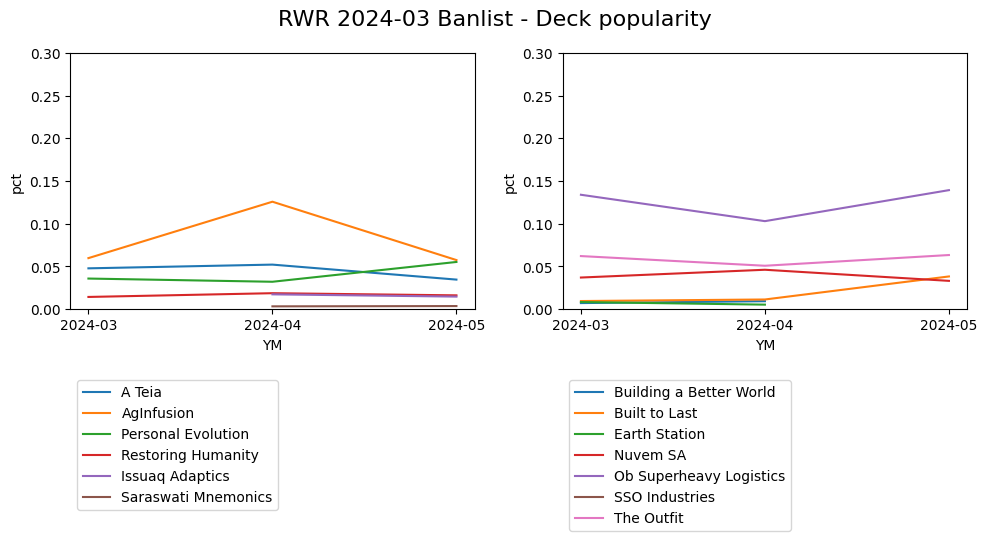

In [15]:
ep.plot_corp_popularity_two_up(
    corp_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.jinteki,
    ep.weyland,
)

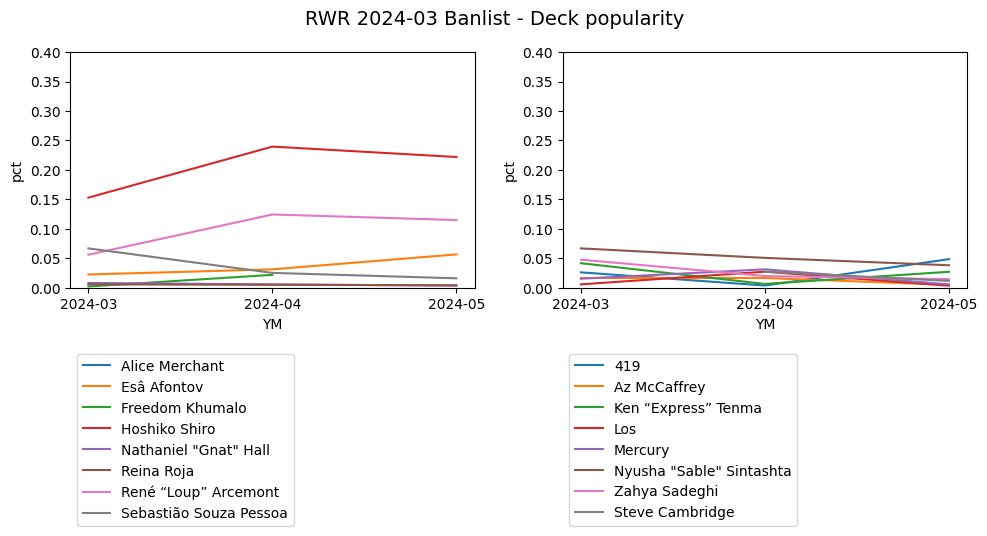

In [16]:
ep.plot_runner_popularity_two_up(
    runner_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.anarch,
    ep.criminal,
)

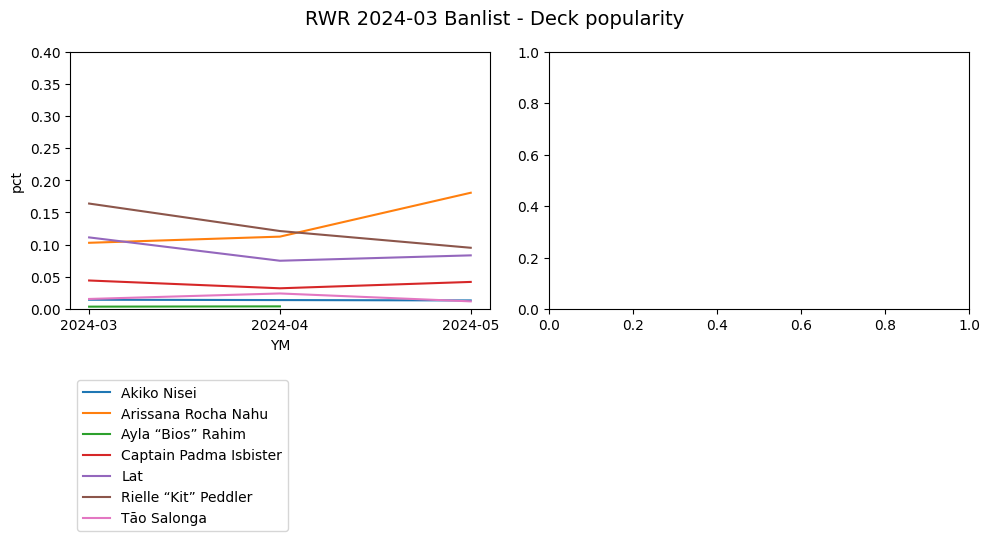

In [17]:
ep.plot_runner_popularity_two_up(
    runner_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.shaper,
    "",  # disable graph
)

# Deck Win Rates Over Time

In [18]:
corp_win_rate_by_event_month = ep.get_corp_win_rate_by_event_month(flattened_matches)

In [19]:
runner_win_rate_by_event_month = ep.get_runner_win_rate_by_event_month(flattened_matches)

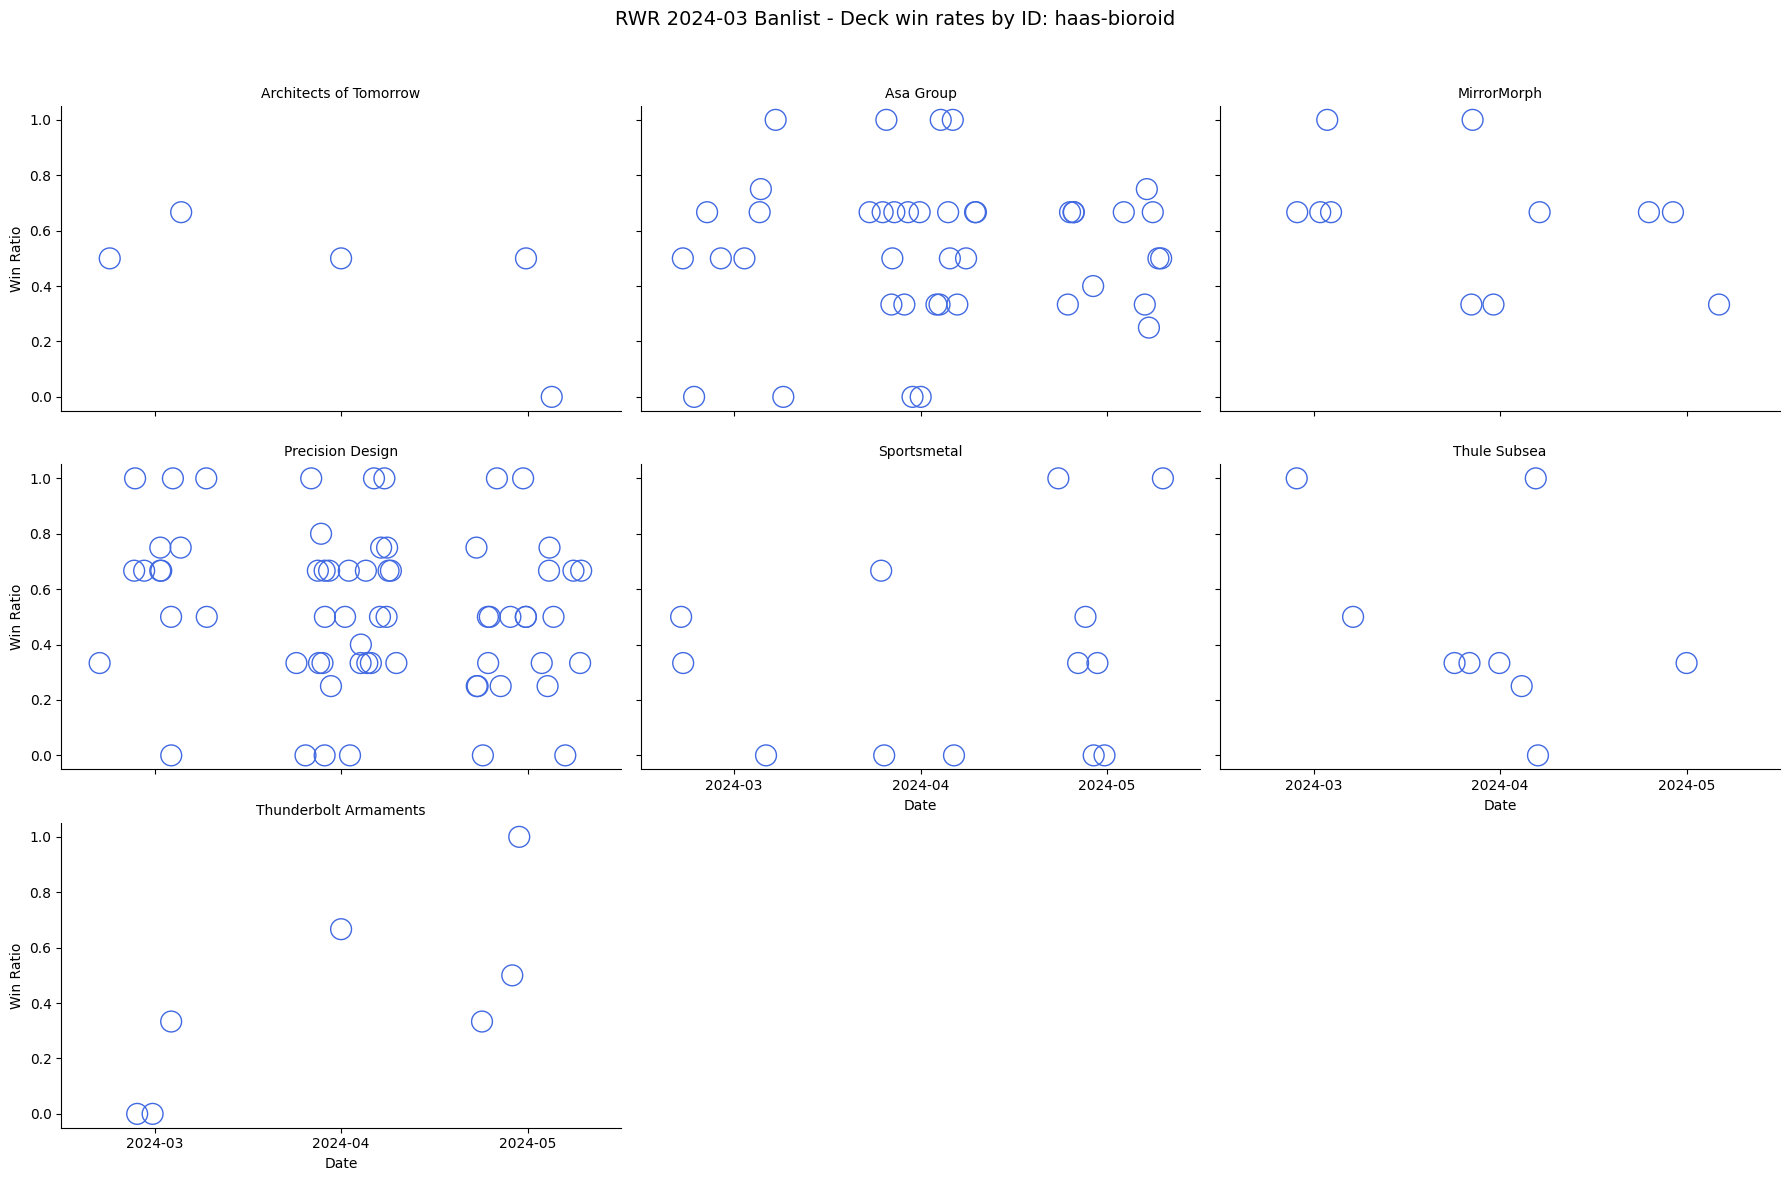

In [20]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.hb
)

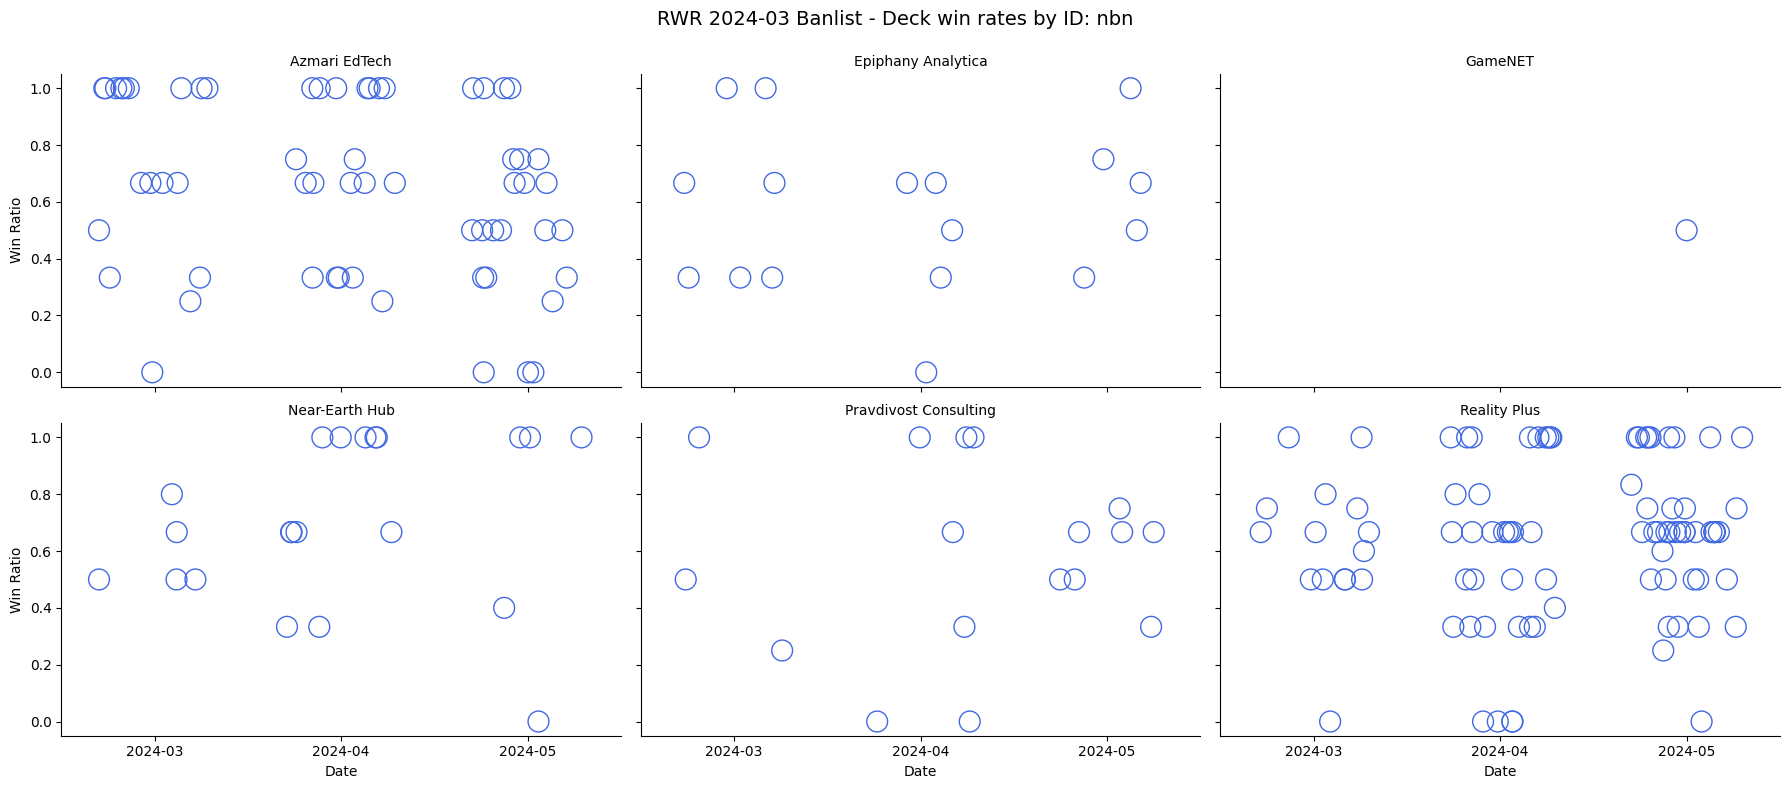

In [21]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.nbn
)

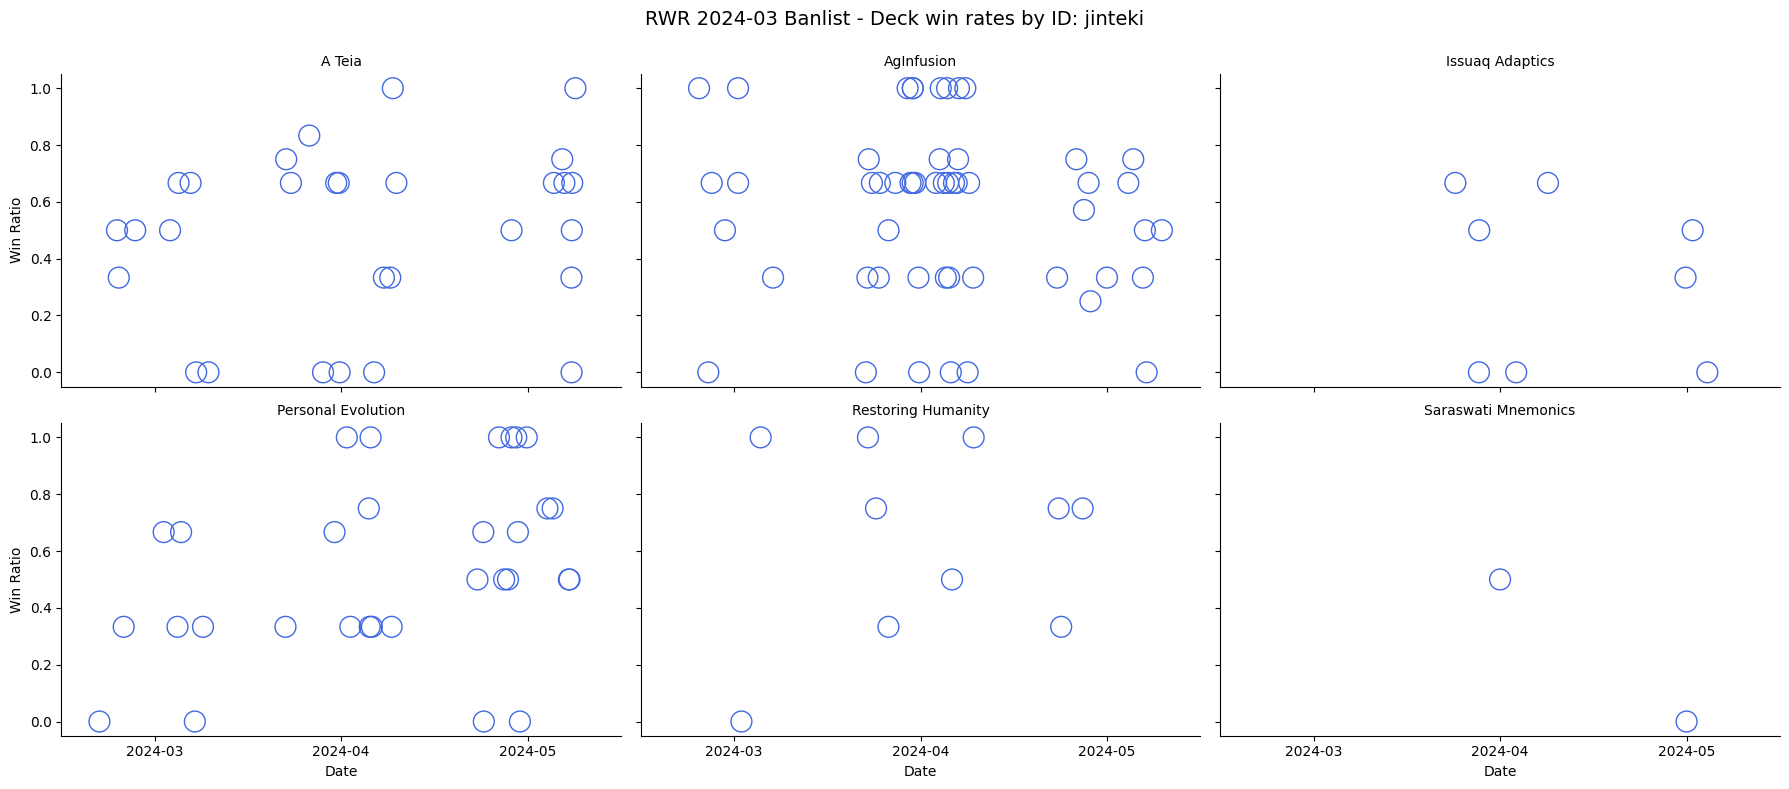

In [22]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.jinteki
)

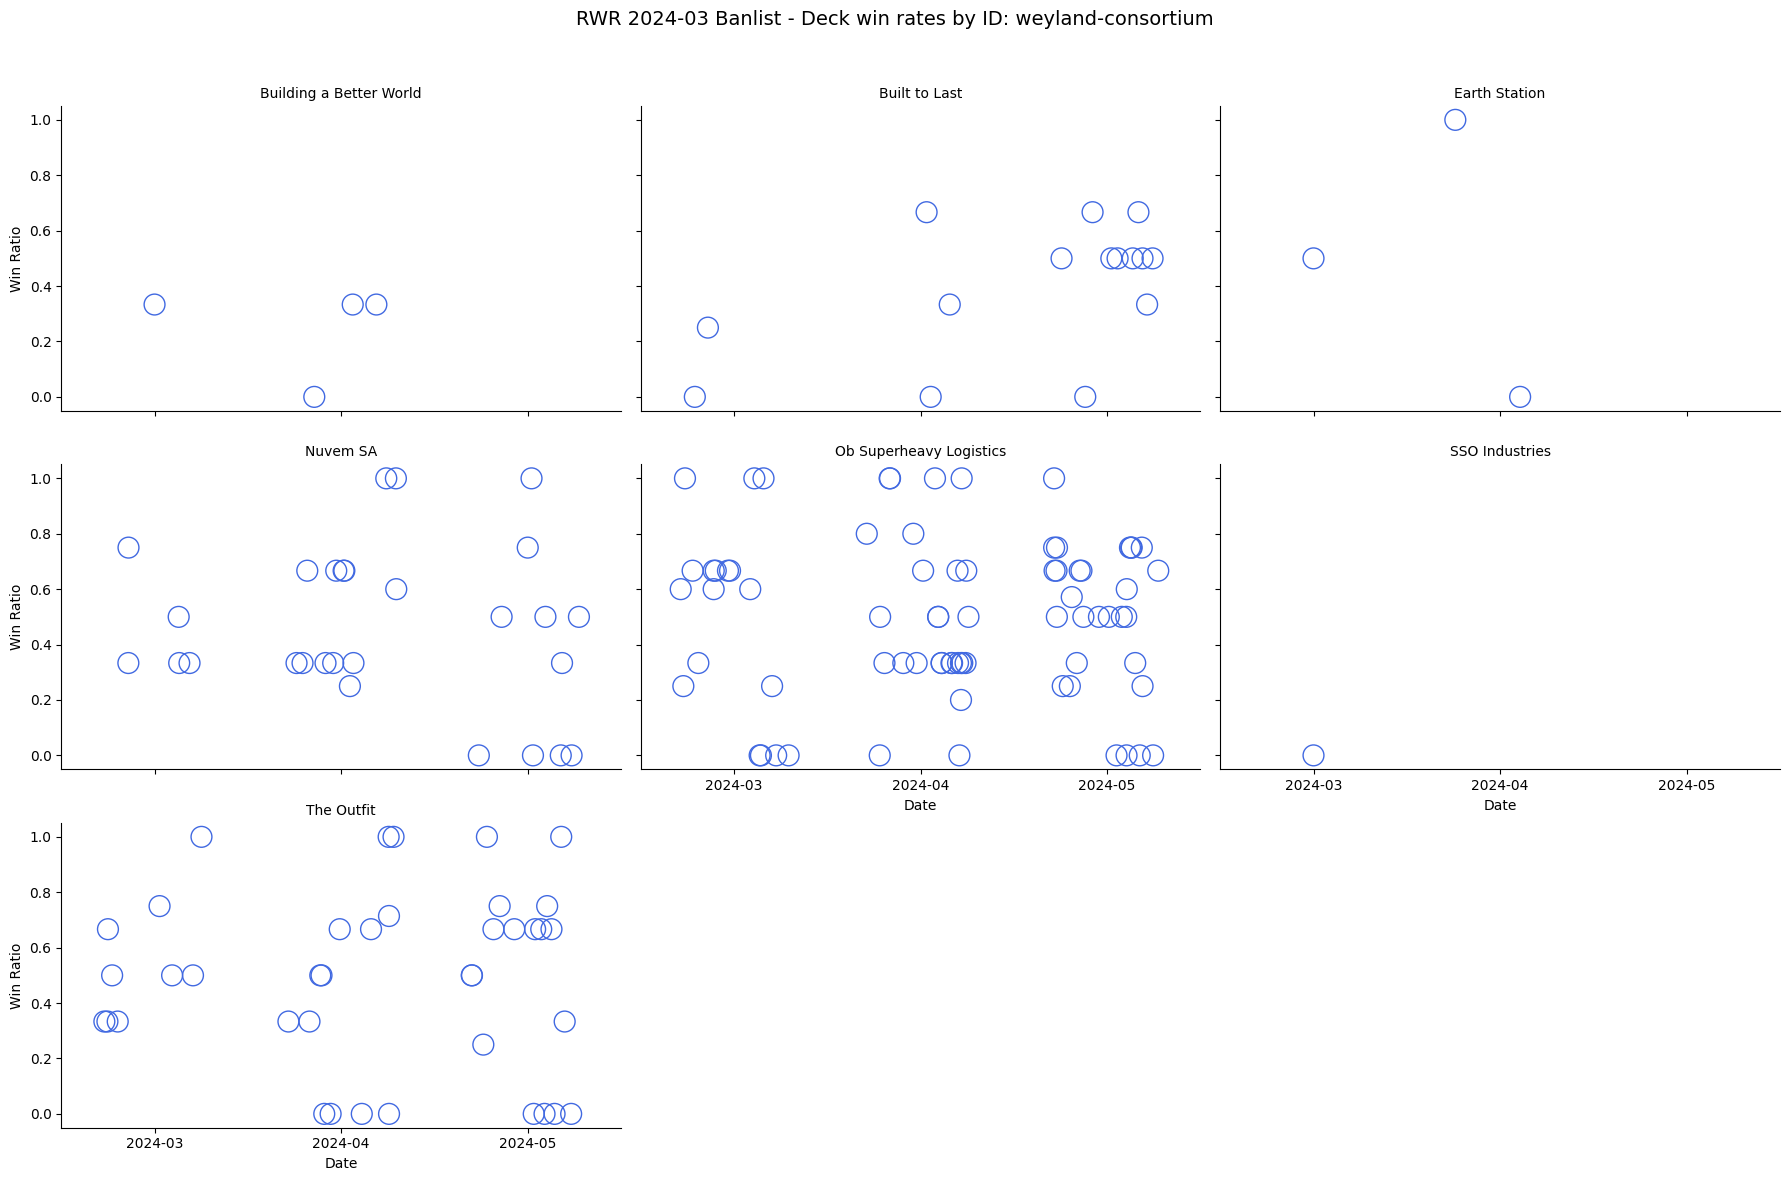

In [23]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.weyland
)

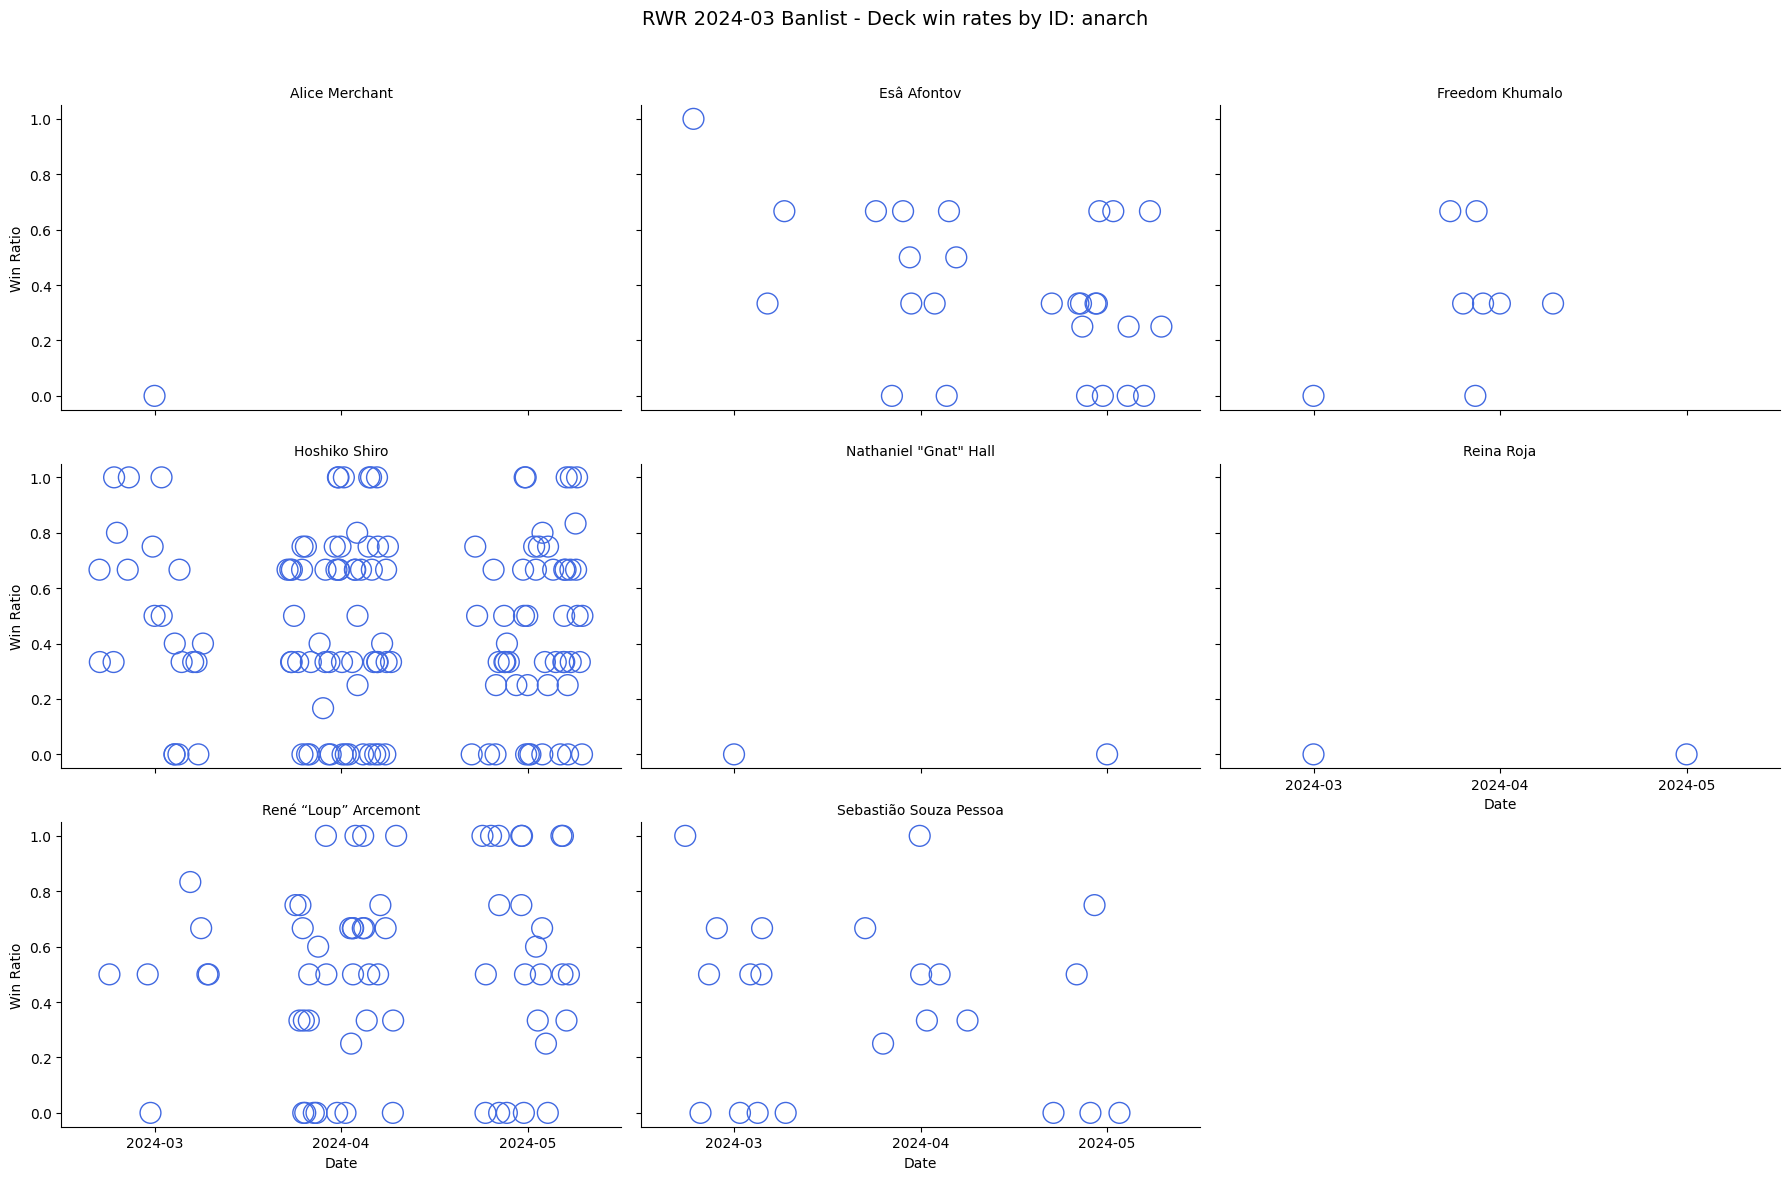

In [24]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.anarch
)

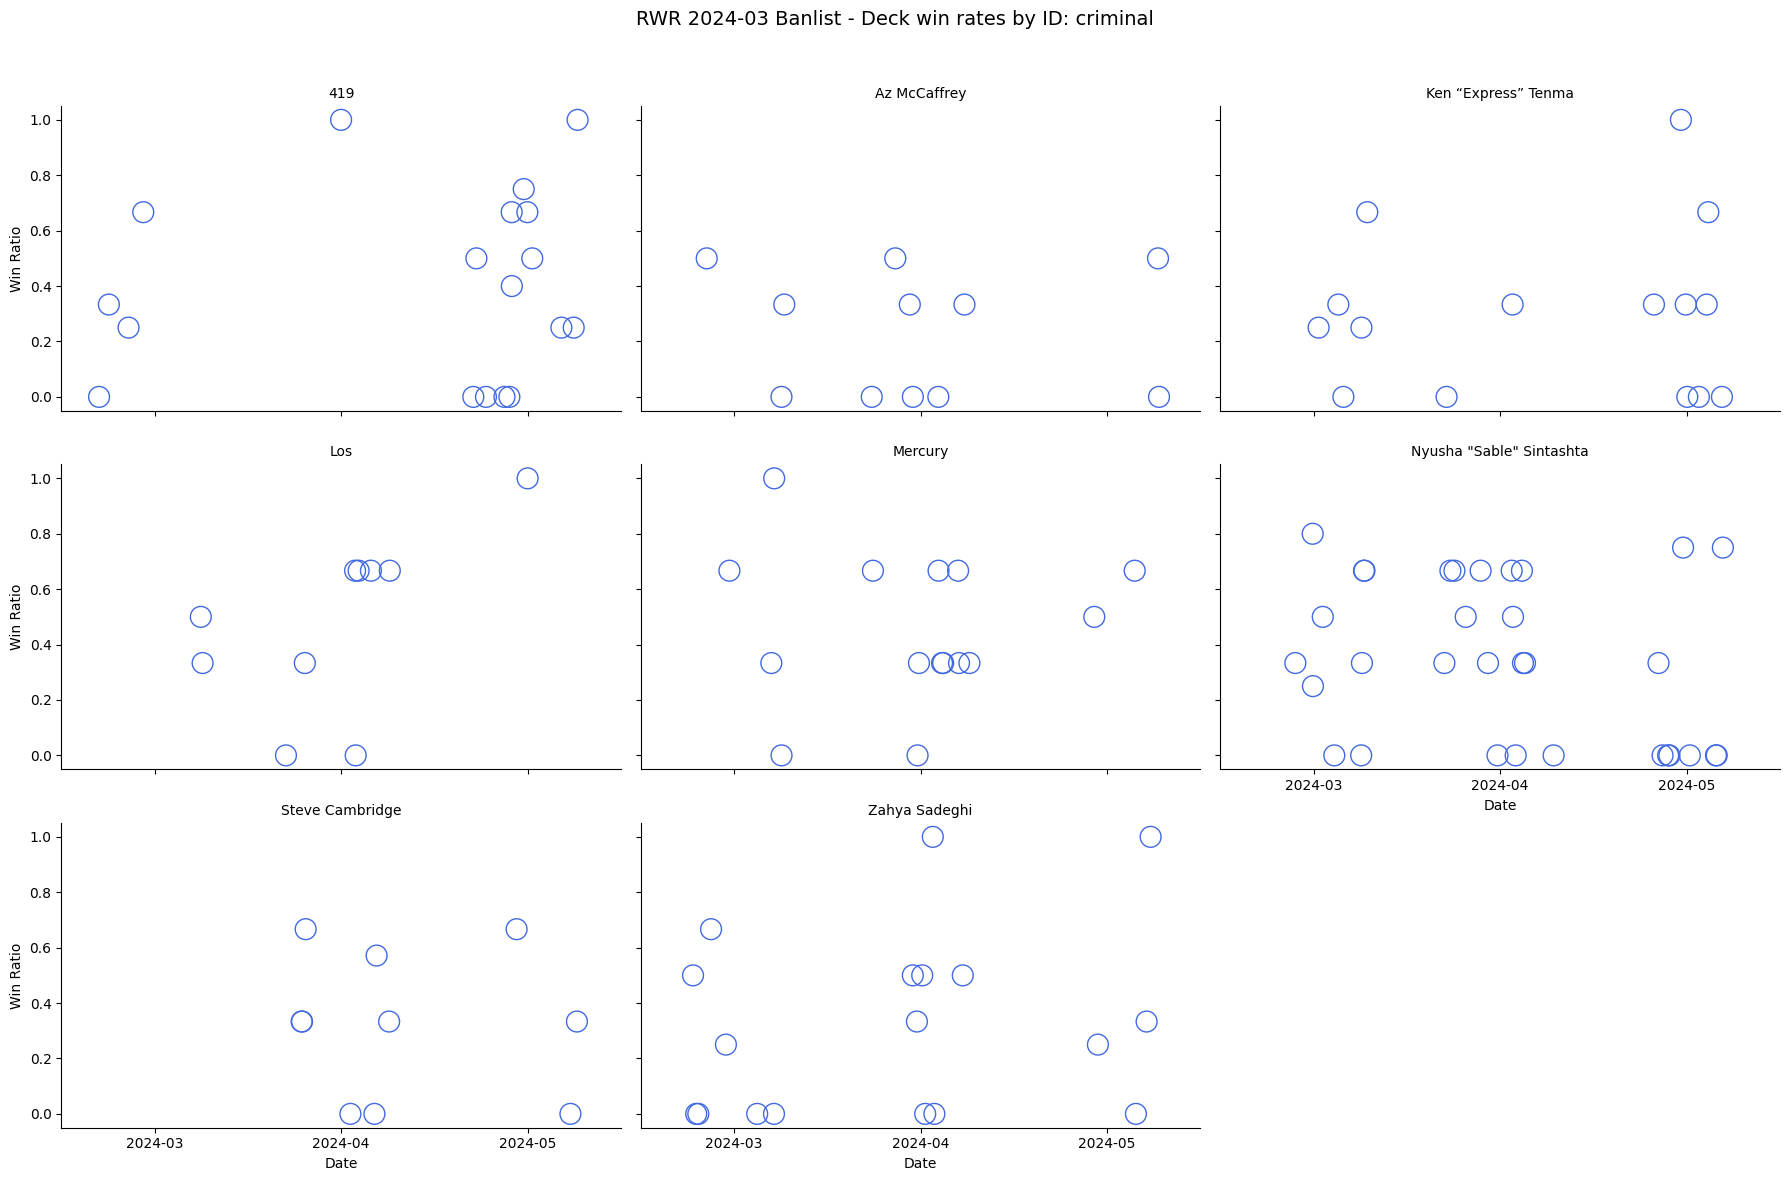

In [25]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.criminal
)

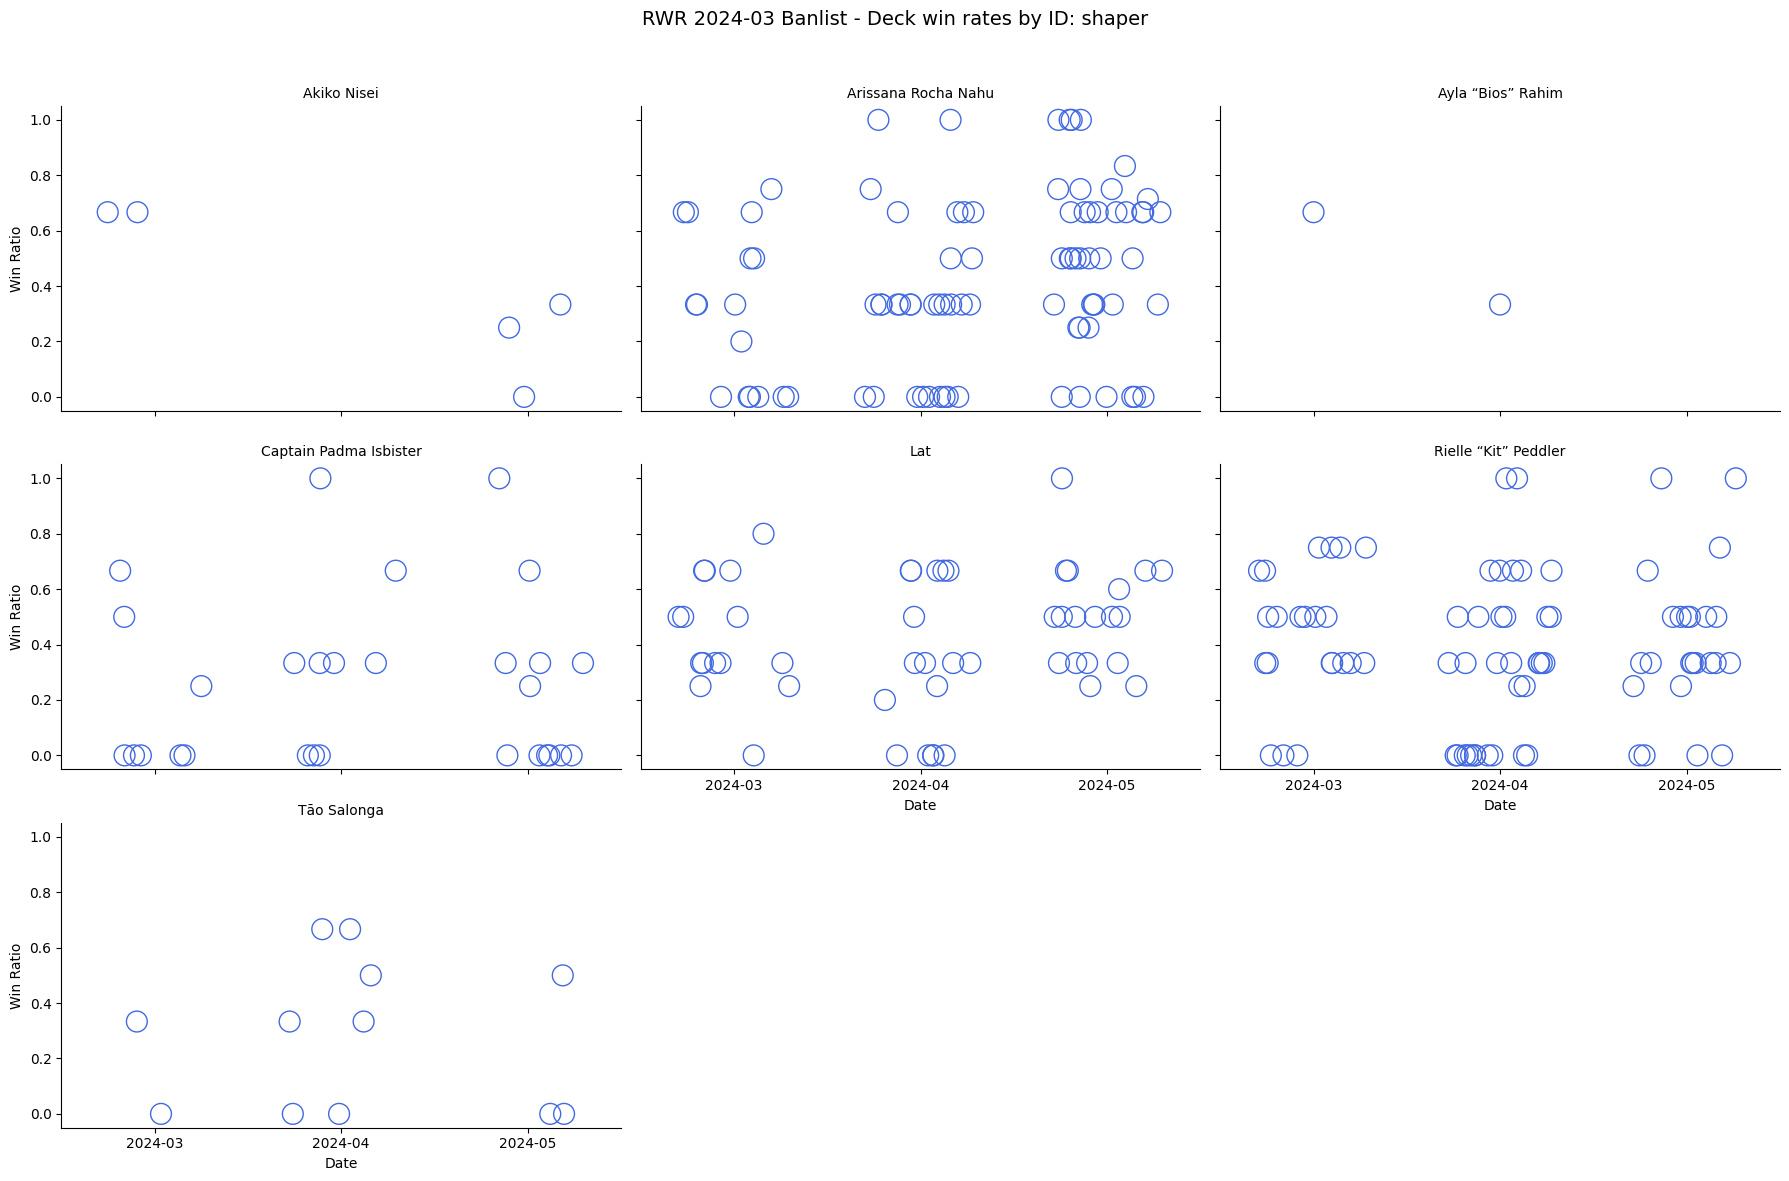

In [26]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.shaper
)

In [27]:
best_corp_decks = corp_win_rate_by_event_month.sort_values(
    by="win_ratio", ascending=False
).reset_index(drop=True)
best_corp_decks[(best_corp_decks["matches_played"] > 3)].head(20)

,event,YM,id,name,corpIdentity,corpFaction,total_wins,matches_played,win_ratio
0,🔥 ECG - H1 2024 CO,2024-04,3137,FireRL,AgInfusion,jinteki,4,4,1.000000
1,NANPC Toronto,2024-04,2968,sadstug,Asa Group,haas-bioroid,4,4,1.000000
13,Milano Circuit Opener 2024 H1,2024-05,3221,koga,Sportsmetal,haas-bioroid,4,4,1.000000
19,NANPC Vancouver,2024-03,2593,Sokka234,AgInfusion,jinteki,5,5,1.000000
32,Accelerated Meta Test april 6th,2024-04,2820,sebastiank,Ob Superheavy Logistics,weyland-consortium,4,4,1.000000
34,Nottingham Netrunner H1 Circuit Opener 2024,2024-03,2551,Cobalt,Azmari EdTech,nbn,4,4,1.000000
49,Fly to EMEA #2,2024-04,3115,davz131,Reality Plus,nbn,5,5,1.000000
69,Online 🌍 🌎 - Summer Showdown 🌞 🦋,2024-05,3367,TorpedoTyrus,Near-Earth Hub,nbn,4,4,1.000000
70,Online 🌍 🌎 - Summer Showdown 🌞 🦋,2024-05,3386,Porkobolo,Azmari EdTech,nbn,4,4,1.000000
72,Online 🌍 🌎 - Summer Showdown 🌞 🦋,2024-05,3395,BinkBonkle,Reality Plus,nbn,4,4,1.000000


In [28]:
best_runner_decks = runner_win_rate_by_event_month.sort_values(
    by="win_ratio", ascending=False
).reset_index(drop=True)
best_runner_decks[(best_runner_decks["matches_played"] > 3)].head(20)

,event,YM,id,name,runnerIdentity,runnerFaction,total_wins,matches_played,win_ratio
0,Online 🌍 🌎 - Summer Showdown 🌞 🦋,2024-05,3403,xFWx FIREBIRD (aka FireRL),René “Loup” Arcemont,anarch,7,7,1.000000
3,Milano Circuit Opener 2024 H1,2024-05,3221,koga,René “Loup” Arcemont,anarch,4,4,1.000000
7,Milano Circuit Opener 2024 H1,2024-05,3226,wowarlok,René “Loup” Arcemont,anarch,4,4,1.000000
10,Standard AMT - May 19th,2024-05,3414,Jai,Hoshiko Shiro,anarch,4,4,1.000000
36,Leuven Circuit Opener - Standard,2024-05,3351,rubenpieters,Arissana Rocha Nahu,shaper,5,5,1.000000
37,Cambridge 2024 H1 CO,2024-05,38237,Johno,Hoshiko Shiro,anarch,4,4,1.000000
48,NANPC Vancouver,2024-03,2590,Man In The Moon,René “Loup” Arcemont,anarch,5,6,0.833333
49,Online 🌍 🌎 - Summer Showdown 🌞 🦋,2024-05,3345,arlekj,Arissana Rocha Nahu,shaper,5,6,0.833333
50,Cambridge 2024 H1 CO,2024-05,38243,HalfHusky,Hoshiko Shiro,anarch,5,6,0.833333
51,Torino Circuit Opener H1 2024 - Milano malissimo,2024-04,2987,🏌️‍♀️💙,Hoshiko Shiro,anarch,4,5,0.800000


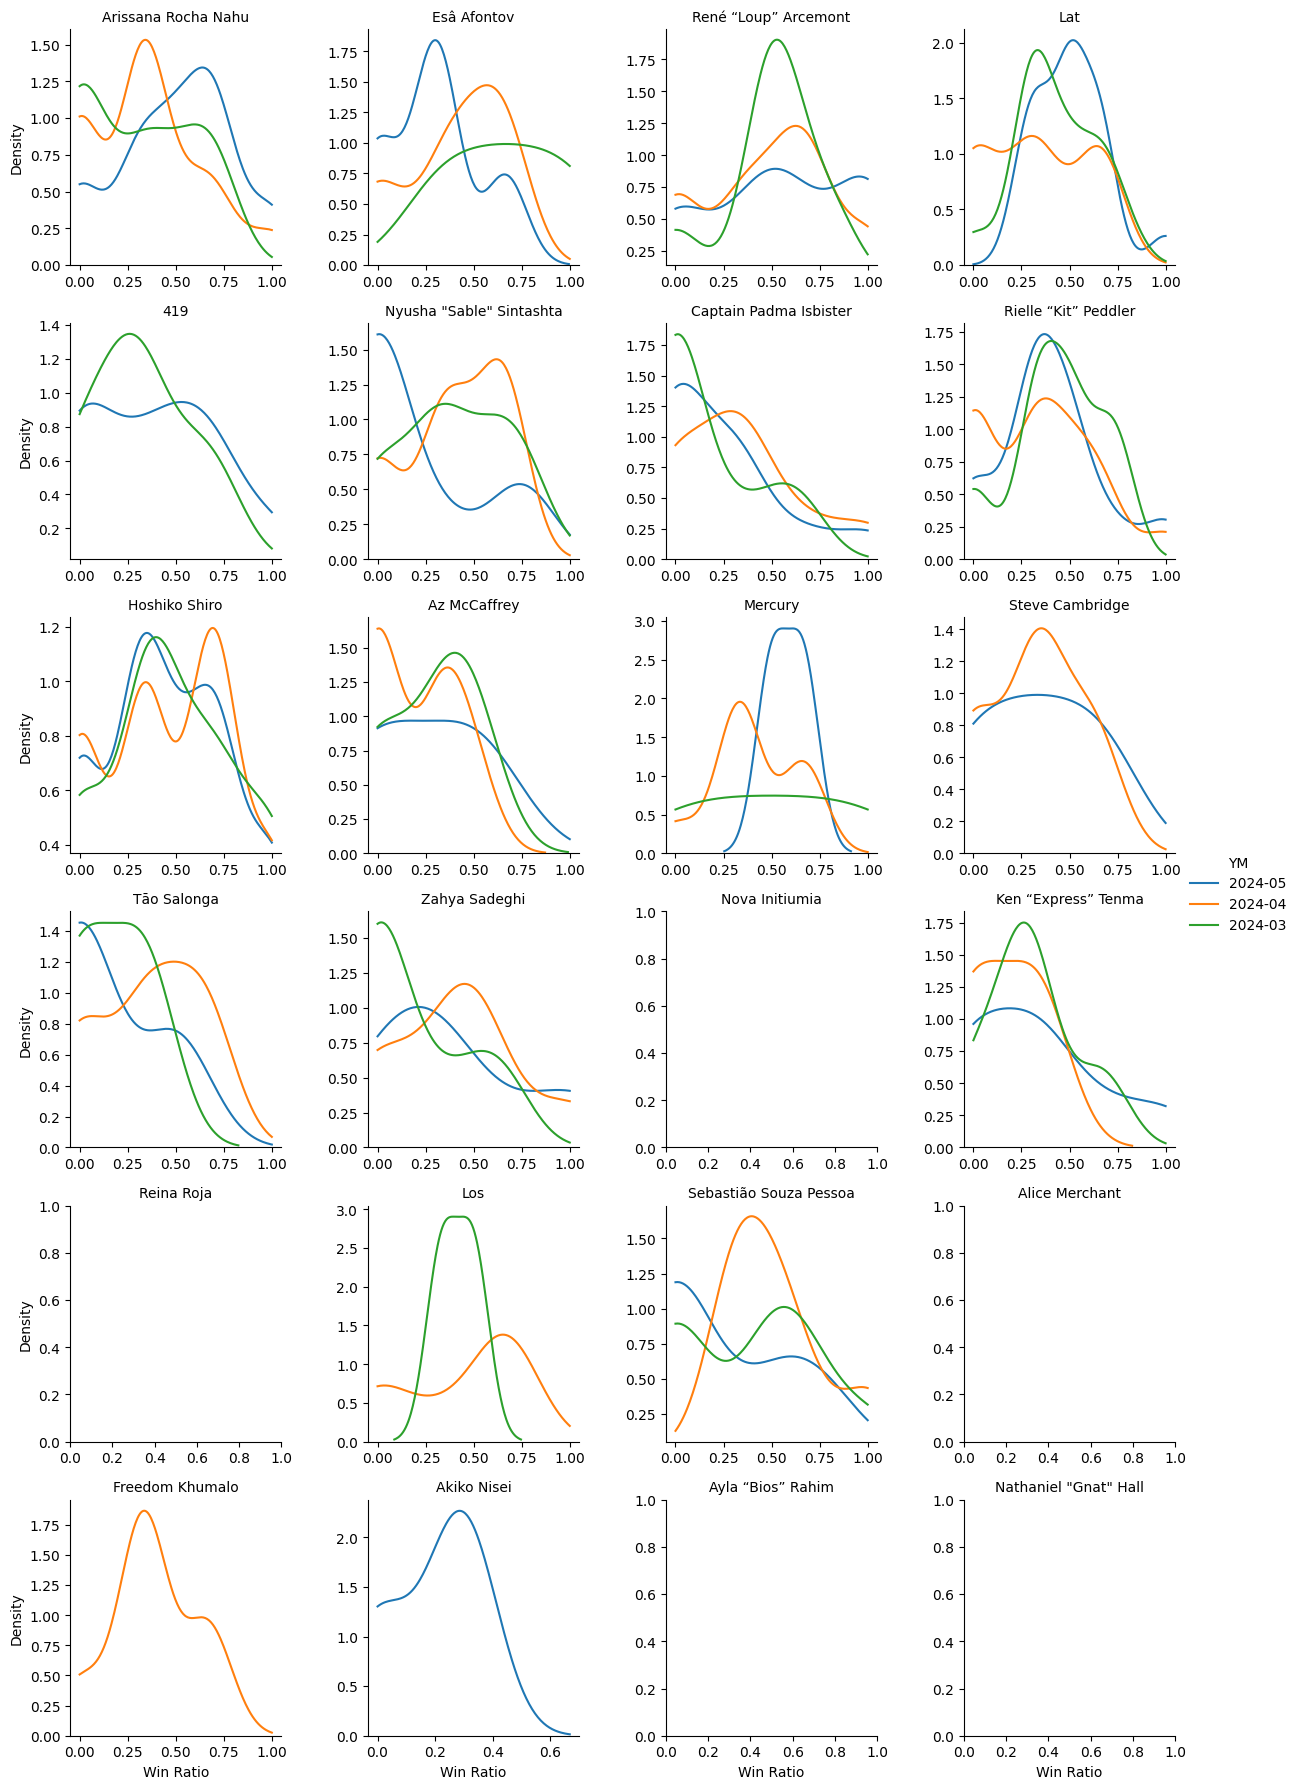

In [31]:
g = sns.FacetGrid(
    runner_win_rate_by_event_month,
    col="runnerIdentity",
    hue="YM",
    col_wrap=4,
    sharex=False,
    sharey=False,
)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "win_ratio", fill=False, warn_singular=False, clip=[0, 1], bw_adjust=0.8)

# Adjust the layout and add titles
g.add_legend()
g.set_axis_labels("Win Ratio", "Density")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()